In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

open_file = "output_bigger10.txt"

In [33]:
# функция, которая получает значение плотности для каждой точки
# amnt - количество отрезков, на которое будет разрезан минимальный симметричный отрезок, куда попадают все точки
# для каждого отрезка считается значение эмпирической плотности
def get_dots(a, amnt):
    a.sort()
    mx_val = a[-1]
    if abs(a[0]) > a[-1]:
        mx_val = abs(a[0])
    (y, bins) = np.histogram(a, bins=amnt, density=True, range = (-mx_val, mx_val))
    x = list()
    for i in range(1, len(bins)):
        x.append((bins[i] + bins[i-1])/2)
    return x, y

In [34]:
# изображает полчившуюся эмпирическую плотность в лог масштабе по оси у
def draw_distribution(a, amnt):
    x, y = get_dots(a, amnt)
    plt.figure(figsize=(12,8))
    plt.yscale('log')
    plt.plot(x, y)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('$\overline{h}_{ш} - \overline{h}_{с}$', fontsize=18)
    plt.grid()

In [35]:
# если не заданы значения breaker и key, то функция симметризует точки относительно нуля на положительную часть
# если задан breaker, то этим значением можно ограничить область изображения графика.
# по умолчанию будут отображени точки, попавшие в отрезок [0; breaker] по х
# если задан параметр key, отличный от "small", то будет отображен отрезок [breaker; mx_val]
def get_symmetrical(x, y, breaker, key):
    left_x = list()
    left_y = list()
    right_x = list()
    right_y = list()
    if breaker is None:
        mx_val = max(abs(x[0]), abs(x[-1]))
        breaker = mx_val
    if key == "small":
        key = 0
    else:
        key = 1
    for i in range(len(x)):
        if key and abs(x[i]) > breaker:
            if x[i] < 0:
                left_x.append(-x[i])
                left_y.append(y[i])
            else:
                right_x.append(x[i])
                right_y.append(y[i])
        elif not key and abs(x[i]) <= breaker:
                if x[i] < 0:
                    left_x.append(-x[i])
                    left_y.append(y[i])
                else:
                    right_x.append(x[i])
                    right_y.append(y[i])
    return left_x, left_y, right_x, right_y

In [36]:
# отображает отраженные относительно 0 графики с заданным масштабом
def draw_symmetrical(a, amnt, breaker = None, key = "small"):
    plt.figure(figsize=(12,8))
    
    x, y = get_dots(a, amnt)
    
    left_x, left_y, right_x, right_y = get_symmetrical(x, y, breaker, key)
    
    plt.plot(left_x, left_y, '-bo', label = "Negative values")
    plt.plot(right_x, right_y, '-ro', label = "Positive values")
    plt.xlabel('$\overline{h}_{ш} - \overline{h}_{с}$', fontsize=18)
    plt.yscale('log')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid()
    plt.legend(prop={'size': 20})
    plt.savefig('symm.eps', format='eps') # сохранение графика в файл

In [37]:
raw_data10 = list()
f = open(open_file, "r")
for line in f:
    arr = line.rstrip().split("\t")
    if int(arr[1]) + int(arr[2]) == 11:
        raw_data10.append(float(arr[0]))
f.close()
print(len(raw_data10))

472936


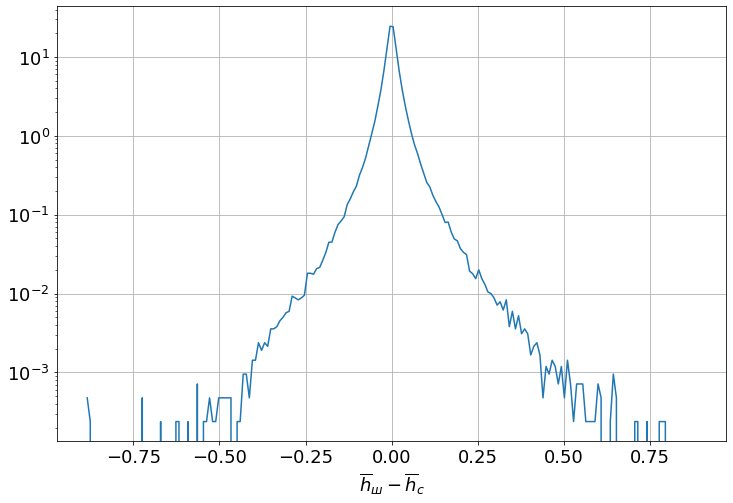

In [38]:
draw_distribution(raw_data10, 200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


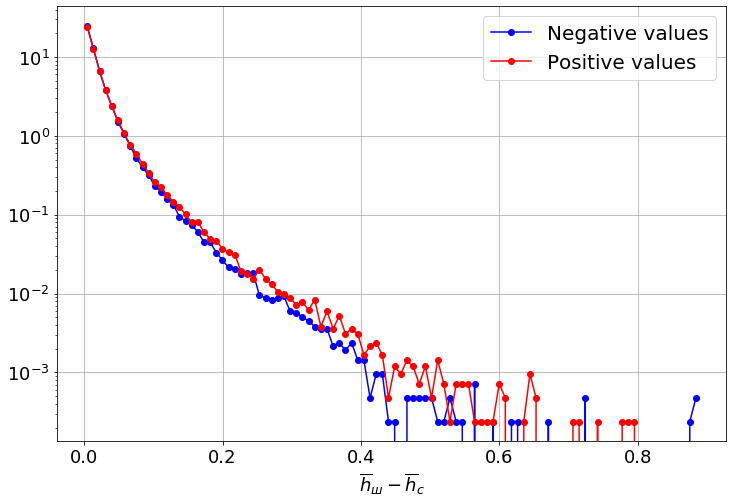

In [39]:
draw_symmetrical(raw_data10, 200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


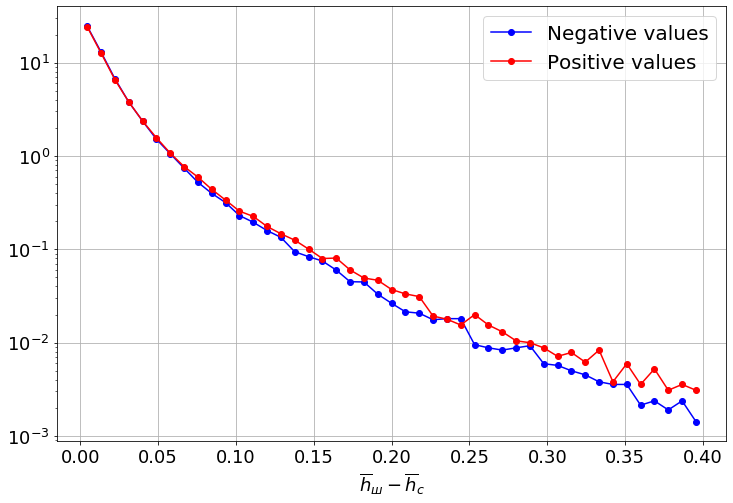

In [40]:
draw_symmetrical(raw_data10, 200, 0.4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


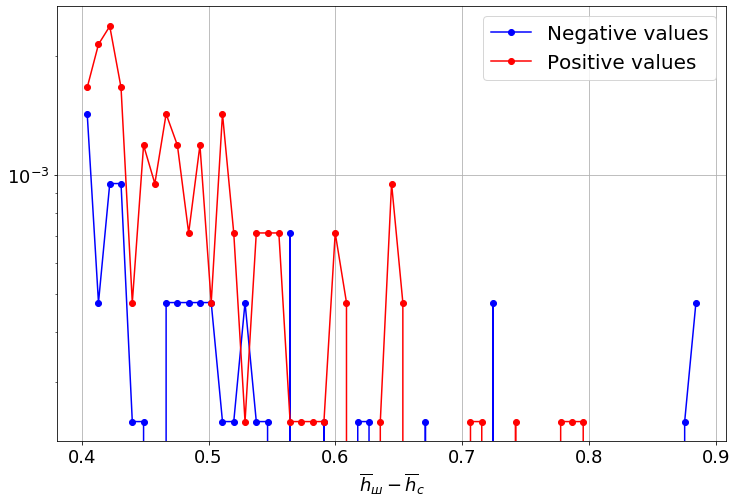

In [41]:
draw_symmetrical(raw_data10, 200, 0.4, "big")